**Day 5: Using a Chi-Square Test**

What are we doing today? Today, we are running a chi-square test to determine the relationship between two categorical variables. We'll use the Aircraft Wildlife Strikes database again.

First, we import our libraries and read in our dataset.

In [91]:
import pandas as pd
import scipy.stats #to run our chi-square test

data = pd.read_csv("../input/database.csv", low_memory=False) #To prevent the mixed data-type warning we experienced yesterday, we set low_memory to False.

Let's remember what our column names are.

In [17]:
print(list(data))

['Record ID', 'Incident Year', 'Incident Month', 'Incident Day', 'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make', 'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model', 'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position', 'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport', 'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility', 'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID', 'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities', 'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage', 'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage', 'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage', 'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage', 'Engine Ingested', 'Propeller Strike', 'Propeller Damage', 'Wing or Rotor Strike', 'Wing or Rotor Damage', 'Fuselage Strike', 'Fuselage Damage', 'Landing Gear Strike', 'Landing Gear Da

A chi-square test explores the possibility of interrelatedness between two variables, i.e., are they independent or connected? Let's take our top five bird species from yesterday and see if species of bird is related to time of day (represented by "Visibility" in the dataset). In other words, are some birds more drawn to airplanes at different times?

In [86]:
top_five = ["MOURNING DOVE", "GULL", "KILLDEER", "AMERICAN KESTREL", "BARN SWALLOW"] #Our top known five, based on the list above. 
viz = ["DAWN", "DAY", "DUSK", "NIGHT"]

species = data["Species Name"].loc[data["Species Name"].isin(top_five)] #isin() returns a Boolean array, which we check our original Series (species) against to create a new Series.
visibility = data["Visibility"].loc[data["Visibility"].isin(viz)] #Ditto here

We need to put these into a new table so that Scipy can run the chi-square test. We'll use Pandas to create a contingency table.

In [94]:
ctable = pd.crosstab(species, visibility)
print(ctable)

Visibility        DAWN   DAY  DUSK  NIGHT
Species Name                             
AMERICAN KESTREL    22  1208    44     37
BARN SWALLOW        20  1953    60     43
GULL               271  4324   247    851
KILLDEER            54  1024    91    328
MOURNING DOVE      218  2165   270    264


Cool. Now we can run our test.

In [88]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(ctable, correction=False)
print("Chi-Statistic: {}; P-Value: {}; DOF: {}\nExpected values: {}".format(chi2, p, dof, expected))

Chi-Statistic: 870.9884177186375; P-Value: 9.727523191472948e-179; DOF: 12
Expected values: [[   56.83526012  1037.02489996    69.17385505   147.96598488]
 [   90.          1642.15384615   109.53846154   234.30769231]
 [  246.80635838  4503.26678524   300.38654217   642.54031421]
 [   64.89884393  1184.1542908     78.98799466   168.95887061]
 [  126.45953757  2307.40017786   153.91314658   329.22713799]]


Our chi-square test indicates that our variables, species and time of day, are probably related! 

We can represent this difference in a few ways. Let's throw together a stacked bar chart with Pandas.

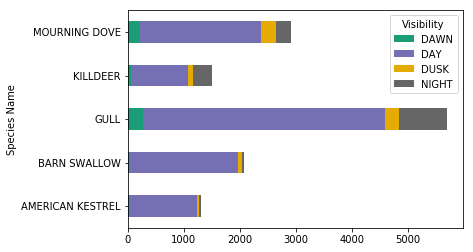

In [117]:
ctable.plot.barh(stacked=True, colormap="Dark2") #The default colors weren't colorblind-friendly; I chose a more accessible colormap. 

We can see by looking at the bar chart that even taking other differences into account, mourning doves and gulls are more likely to appear at dawn, and those and killdeer are more likely to appear at dusk and night. Barn swallows and kestrels really only show up during the day, which might be why they feature in fewer strikes overall. 